# Read Astropy tables on PSF

- creation June 30th 2016
- author Sylvie Dagoret-Campagne

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from astropy.modeling import models
from astropy import units as u
from astropy import nddata
from astropy.io import fits

from astropy.table import Table
from astropy.table import Column

import pandas as pd

In [41]:
intputtablefile1='HD163466_grating_1-25_TablePSF.fits'

In [42]:
 t1 = Table.read(intputtablefile1)

In [43]:
t1

num,file,time,exposure,nbstars,prfx,pfry,sig_prfx,sig_prfy
int32,str31,str23,float64,int32,float64,float64,float64,float64
0,AssScImHD163466_grating_1.fits,2016-05-12T07:44:43.031,5.0,64,3.27269668874,3.88553341132,0.255804340104,0.630429467266
1,AssScImHD163466_grating_2.fits,2016-05-12T07:45:25.729,5.0,77,3.23553358593,3.68556328674,0.257597799449,0.710772994991
2,AssScImHD163466_grating_3.fits,2016-05-12T07:45:39.969,5.0,62,3.32012000341,3.75058997275,0.349992606517,0.639362413853
3,AssScImHD163466_grating_4.fits,2016-05-12T07:45:53.737,5.0,52,3.40832433709,3.94203727252,0.278009048375,0.638777321358
4,AssScImHD163466_grating_5.fits,2016-05-12T07:46:08.135,5.0,58,3.31063509983,3.74642615098,0.223678199732,0.655809560281
5,AssScImHD163466_grating_6.fits,2016-05-12T07:46:21.770,5.0,37,3.41812953386,3.80001190974,0.122160814787,0.498240852554
6,AssScImHD163466_grating_7.fits,2016-05-12T07:47:45.901,5.0,27,3.26659530388,3.90464523342,0.127364793996,0.506540068331
7,AssScImHD163466_grating_8.fits,2016-05-12T07:47:54.975,5.0,35,3.39261307653,3.96786115165,0.274179753652,0.516360179579
8,AssScImHD163466_grating_9.fits,2016-05-12T07:48:04.034,5.0,44,3.19352421633,3.71210090293,0.207016221129,0.591840708818


In [44]:
df1=t1.to_pandas()

In [45]:
df1.describe() # pandas able to show statistics

,num,exposure,nbstars,prfx,pfry,sig_prfx,sig_prfy
count,25.000000,25.0,25.000000,25.000000,25.000000,25.000000,25.000000
mean,12.000000,3.4,31.960000,3.380461,3.818436,0.162651,0.408679
std,7.359801,2.0,20.210311,0.113820,0.103179,0.096924,0.226536
min,0.000000,1.0,9.000000,3.193524,3.642986,0.048746,0.109130
25%,6.000000,1.0,12.000000,3.298594,3.746426,0.073465,0.149382
50%,12.000000,5.0,35.000000,3.387251,3.813110,0.132763,0.506540
75%,18.000000,5.0,42.000000,3.448174,3.904645,0.255804,0.596840
max,24.000000,5.0,77.000000,3.654467,3.982965,0.349993,0.710773


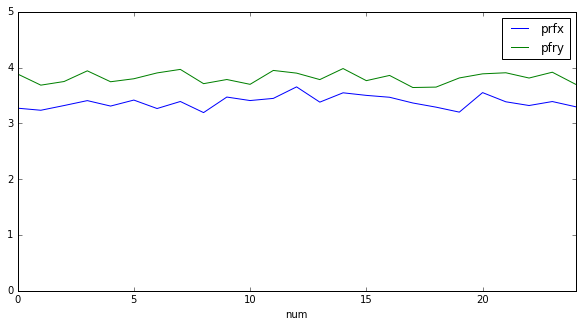

In [65]:
plt.figure(figsize=(10,6))
df1_2=df1[['num', 'prfx','pfry']]
df1_2.plot('num',['prfx','pfry'],ylim=(0.,5.),figsize=(10,5))
plt.legend(loc='upper right')
plt.show()

In [48]:
intputtablefile2='HD158485_grat_1-50_TablePSF.fits'

In [49]:
t2 = Table.read(intputtablefile2)

In [51]:
df2=t2.to_pandas()

In [52]:
df2.describe()

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,num,exposure,nbstars,prfx,pfry,sig_prfx,sig_prfy
count,50.00000,50.000000,50.000000,45.000000,48.000000,45.000000,48.000000
mean,24.50000,3.372000,18.980000,3.333004,3.510633,0.260939,0.432202
std,14.57738,2.108877,15.938005,0.378728,0.302113,0.199223,0.318711
min,0.00000,0.400000,1.000000,2.866824,3.019007,0.000000,0.000000
25%,12.25000,1.000000,7.000000,NaN,NaN,NaN,NaN
50%,24.50000,5.000000,13.000000,NaN,NaN,NaN,NaN
75%,36.75000,5.000000,28.500000,NaN,NaN,NaN,NaN
max,49.00000,5.000000,56.000000,4.474156,4.623810,0.837820,0.912355


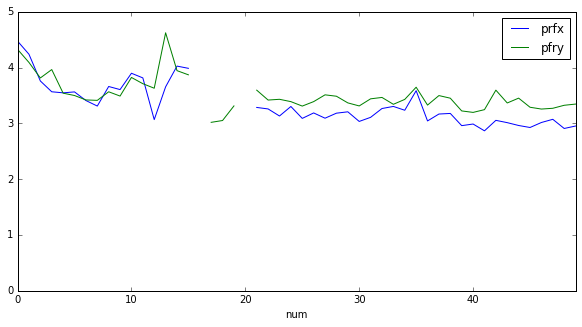

In [66]:
plt.figure(figsize=(10,6))
df2_2=df2[['num', 'prfx','pfry']]
df2_2.plot('num',['prfx','pfry'],ylim=(0.,5.),figsize=(10,5))
plt.legend(loc='upper right')
plt.show()  # pandas able to remove NaN

In [76]:
df2_no_missing = df2.dropna()

In [77]:
df2_no_missing.describe()

,num,exposure,nbstars,prfx,pfry,sig_prfx,sig_prfy
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,25.222222,3.191111,20.844444,3.333004,3.536146,0.260939,0.461015
std,15.201508,2.148977,15.723398,0.378728,0.292681,0.199223,0.308086
min,0.000000,0.400000,1.000000,2.866824,3.197155,0.000000,0.000000
25%,11.000000,1.000000,8.000000,3.054724,3.346323,0.157338,0.150688
50%,27.000000,5.000000,15.000000,3.207648,3.451709,0.222837,0.428237
75%,38.000000,5.000000,33.000000,3.566803,3.595877,0.279615,0.769873
max,49.000000,5.000000,56.000000,4.474156,4.623810,0.837820,0.912355


In [54]:
intputtablefile3='HD158485_grat_51-100_TablePSF.fits'

In [55]:
t3 = Table.read(intputtablefile3)

In [56]:
df3=t3.to_pandas()

In [75]:
df3.describe()

,num,exposure,nbstars,prfx,pfry,sig_prfx,sig_prfy
count,50.00000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,24.50000,2.48000,26.400000,3.029724,3.592927,0.228702,0.413208
std,14.57738,2.09021,17.314616,0.148261,0.132934,0.111798,0.285283
min,0.00000,0.40000,5.000000,2.704380,3.281386,0.108625,0.058110
25%,12.25000,1.00000,13.250000,2.937760,3.522611,0.169668,0.178102
50%,24.50000,1.00000,19.000000,3.038586,3.575247,0.197276,0.230499
75%,36.75000,5.00000,43.750000,3.118689,3.679681,0.243171,0.698741
max,49.00000,5.00000,69.000000,3.373055,3.968515,0.669269,0.863951


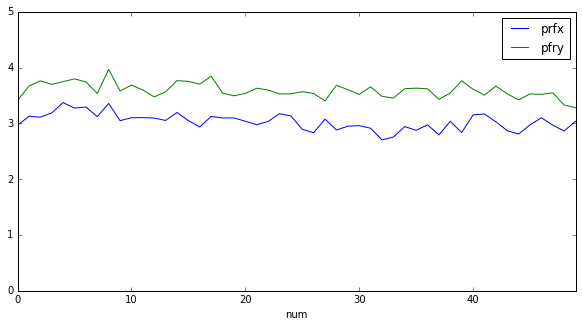

In [67]:
df3_2=df3[['num', 'prfx','pfry']]
df3_2.plot('num',['prfx','pfry'],ylim=(0.,5.),figsize=(10,5))
plt.legend(loc='upper right')
plt.show()  # pandas able to remove NaN

In [68]:
intputtablefile4='HD158485_grat_103-132_TablePSF.fits'

In [69]:
t4 = Table.read(intputtablefile4)

In [71]:
df4=t4.to_pandas()

In [74]:
df4.describe()

,num,exposure,nbstars,prfx,pfry,sig_prfx,sig_prfy
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,14.500000,2.133333,23.600000,3.293882,3.241749,0.317081,0.454643
std,8.803408,2.076691,17.621695,0.333514,0.151522,0.268937,0.357247
min,0.000000,0.400000,4.000000,2.982135,2.978183,0.106278,0.070986
25%,7.250000,0.400000,10.000000,3.115525,3.175703,0.200440,0.136120
50%,14.500000,1.000000,15.500000,3.243751,3.219538,0.227856,0.291260
75%,21.750000,5.000000,46.250000,3.348283,3.290000,0.268977,0.853948
max,29.000000,5.000000,53.000000,4.825302,3.686235,1.307125,1.066353


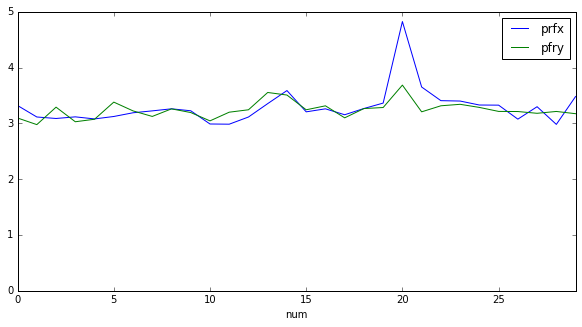

In [72]:
df4_2=df4[['num', 'prfx','pfry']]
df4_2.plot('num',['prfx','pfry'],ylim=(0.,5.),figsize=(10,5))
plt.legend(loc='upper right')
plt.show()  # pandas able to remove NaN